In [10]:
import pandas as pd
from data import data_reader, TGDataset
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'
import torch
import torch.nn as nn
from PIL import Image
from torch.utils.data import DataLoader
import numpy as np
from torchvision import models, transforms
import matplotlib.pyplot as plt

Tensor = torch.Tensor
rand_m = np.random.random

In [2]:
class args:
    bs = 128
    path = 'train2000/'
dr = data_reader(args, 'train2000/train2000.csv')

In [3]:
dr.mlb.classes_

array(['CITY', 'DESERT', 'FARMLAND', 'LAKE', 'MOUNTAIN', 'OCEAN'],
      dtype=object)

In [4]:
class model_resnet(nn.Module):
    def __init__(self, num_class):
        super(model_resnet, self).__init__()
        self.resnet34 = models.resnet34()
        self.argp = nn.AdaptiveAvgPool2d(1)
        self.fc = nn.Linear(512, num_class)
    
    def forward(self, x):
        x = self.resnet34.conv1(x)
        x = self.resnet34.bn1(x)
        x = self.resnet34.relu(x)
        x = self.resnet34.maxpool(x)
        x = self.resnet34.layer1(x)
        x = self.resnet34.layer2(x)
        x = self.resnet34.layer3(x)
        x = self.resnet34.layer4(x)
        x = self.argp(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

In [5]:
model = model_resnet(6)

In [6]:
model.load_state_dict(torch.load('weights/resnet34/best_params_acc96.25.pth'))

In [7]:
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                             std=[0.229, 0.224, 0.225])
trm = transforms.Compose([
    transforms.Resize(224),
    transforms.ToTensor(),
    normalize
])

In [8]:
def im_read(path):
    img = Image.open(path)
    return img.convert('RGB')

In [9]:
df = pd.read_csv('test1000.csv', header=None)

In [10]:
idx = 34

In [11]:
PATH = 'test1000/'
im = im_read('train2000/' + dr.train_df[0][idx])

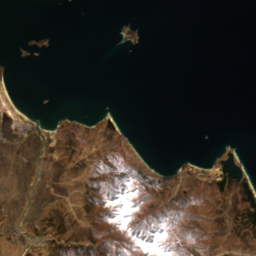

In [12]:
im

In [13]:
x = model(trm(im).unsqueeze(0))

In [14]:
x

tensor([[-4.9930,  1.8179, -1.0613, -0.7824, -0.8995,  2.6456]],
       grad_fn=<ThAddmmBackward>)

In [15]:
torch.max(x, 1)[1]

tensor([5])

In [16]:
dr.train_df[1][idx]

'OCEAN'

In [17]:
d = {'DESERT' : 0,
     'CITY' : 0,
     'OCEAN' : 0,
     'MOUNTAIN' : 0,
     'LAKE' : 0,
     'FARMLAND' : 0}
for i in dr.train_df[1]:
    d[i] += 1

In [18]:
d

{'DESERT': 512,
 'CITY': 34,
 'OCEAN': 362,
 'MOUNTAIN': 369,
 'LAKE': 140,
 'FARMLAND': 183}